<a href="https://colab.research.google.com/github/armindocachada/create-3d-model-using-python/blob/master/Python_notebook_to_learn_how_to_create_3D_objects_in_STL_format.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Numpy-stl library


In [1]:
!pip3 install numpy-stl

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import numpy as np
from stl import mesh

Read image from file and display on the screen

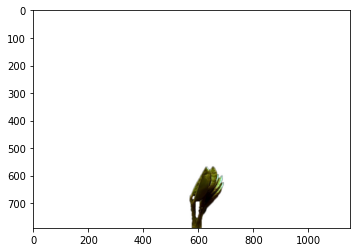

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import os

path = os.getcwd() + "/src/database/plants/stage01.jpg"
im = Image.open(path)
plt.imshow(im)


Convert image to grey scale


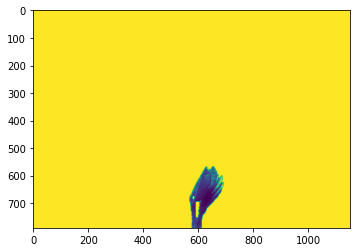

In [5]:
grey_img = Image.open(path).convert('L')
plt.imshow(grey_img)

Create simple 2d square surface with 2 triangles

Create surface 1000 x 5000 with N triangles

In [8]:
grey_img = Image.open(path).convert('L')

max_size=(500,500)
max_height=10
min_height=0

#height=0 for minPix
#height=maxHeight for maxPIx

grey_img.thumbnail(max_size)
imageNp = np.array(grey_img)
maxPix=imageNp.max()
minPix=imageNp.min()



print(imageNp)
(ncols,nrows)=grey_img.size

vertices=np.zeros((nrows,ncols,3))

for x in range(0, ncols):
  for y in range(0, nrows):
    pixelIntensity = imageNp[y][x]
    z = (pixelIntensity * max_height) / maxPix
    #print(imageNp[y][x])
    vertices[y][x]=(x, y, z)

faces=[]

for x in range(0, ncols - 1):
  for y in range(0, nrows - 1):
    # create face 1
    vertice1 = vertices[y][x]
    vertice2 = vertices[y+1][x]
    vertice3 = vertices[y+1][x+1]
    face1 = np.array([vertice1,vertice2,vertice3])

    # create face 2 
    vertice1 = vertices[y][x]
    vertice2 = vertices[y][x+1]
    vertice3 = vertices[y+1][x+1]

    face2 = np.array([vertice1,vertice2,vertice3])

    faces.append(face1)
    faces.append(face2)

print(f"number of faces: {len(faces)}")
facesNp = np.array(faces)
# Create the mesh
surface = mesh.Mesh(np.zeros(facesNp.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        surface.vectors[i][j] = facesNp[i][j]
# Write the mesh to file "plant.stl"
surface.save('plant.stl')

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
number of faces: 341316
